In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5178387


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5178387/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5178387/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [10]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [12]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [9]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

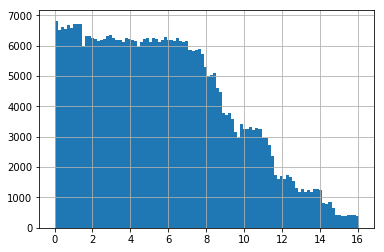

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [13]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [14]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [15]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [16]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [17]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [18]:
qdf=qdf[~qdf['index'].isin({0,16,2,7,14,4,10,1})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((203674, 1), (203674, 100), (203674,))

In [19]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{3: 22721, 5: 20661, 6: 18112, 8: 20285, 9: 24722, 11: 28282, 12: 22648, 13: 21974, 15: 24269}'

In [20]:
quakes=set(qdf['index'])
quakes

{3, 5, 6, 8, 9, 11, 12, 13, 15}

In [21]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [22]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [23]:
testX=testdf.values
testX.shape

(2624, 100)

In [24]:
trainX=datadf.values
trainX.shape, qdf.shape

((203674, 100), (203674, 1))

In [25]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a

CPU times: user 26min 33s, sys: 2min 55s, total: 29min 28s
Wall time: 2min 40s


In [26]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 182661, 2624, 3000)

In [27]:
qdf.iloc[topidxs].head()

index
index                    
quake_06_o17988314      6
quake_06_o23373381      6
quake_06_o23373373      6
quake_06_o23382979      6
quake_06_o18021814      6

In [28]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))

In [29]:
idxdf.shape

(3000, 2624)

In [30]:
idxdf.head()

0     1     2     3     4     5     6     7     8     9     ...  2614  \
0     6    15    13     6    15     9     6     8     9     6  ...    15   
1     6    15    13     6    15     9     6    13     5     6  ...    15   
2     6    15    13     6    15     9     6    13     3     6  ...    15   
3     6    15    13     6    15     9     6    13     9     6  ...    15   
4     6    15    13     6    15     9     6     9     9     6  ...    15   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0    15    11    15    15    11    15    15     8    15  
1    15    12    15    15    15    15    15     8    15  
2    15    11    15    15    11    15    15     8    15  
3     5    11    15    15    12    15    15     8    15  
4    15     6    15    15    11    15    15     8    15  

[5 rows x 2624 columns]

In [31]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:1000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.sort_index(ascending=False).cumsum(0)/len(testX),2))

3 5 6 8 9 11 12 13 15 


0                                                
qno      3     5     6     8     9     11    12    13    15
index                                                      
0.0    0.83  0.41  0.34  0.59  0.59  0.53  0.79  0.57  0.11
0.1    0.09  0.38  0.23  0.26  0.22  0.32  0.16  0.32  0.21
0.2    0.04  0.16  0.11  0.12  0.14  0.12  0.04  0.10  0.19
0.3    0.02  0.05  0.07  0.03  0.04  0.03  0.01  0.01  0.10
0.4    0.01  0.01  0.05  0.00  0.01  0.01  0.00  0.00  0.05
0.5    0.00  0.00  0.07   NaN  0.00  0.00   NaN   NaN  0.04
0.6     NaN   NaN  0.09   NaN   NaN   NaN   NaN   NaN  0.04
0.7     NaN   NaN  0.04   NaN   NaN   NaN   NaN   NaN  0.03
0.8     NaN   NaN  0.00   NaN   NaN   NaN   NaN   NaN  0.04
0.9     NaN   NaN  0.00   NaN   NaN   NaN   NaN   NaN  0.05
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.14

0                                                
qno      3     5     6     8     9     11    12    13    15
index                                                      
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.14
0.9     NaN   NaN  0.00   NaN   NaN   NaN   NaN   NaN  0.19
0.8     NaN   NaN  0.00   NaN   NaN   NaN   NaN   NaN  0.23
0.7     NaN   NaN  0.05   NaN   NaN   NaN   NaN   NaN  0.26
0.6     NaN   NaN  0.14   NaN   NaN   NaN   NaN   NaN  0.30
0.5    0.00  0.00  0.21   NaN  0.00  0.00   NaN   NaN  0.34
0.4    0.01  0.01  0.26  0.00  0.02  0.01  0.00  0.00  0.39
0.3    0.03  0.05  0.33  0.03  0.06  0.03  0.01  0.01  0.49
0.2    0.07  0.21  0.44  0.15  0.20  0.15  0.05  0.11  0.68
0.1    0.17  0.59  0.66  0.41  0.41  0.47  0.21  0.43  0.89
0.0    1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00

In [32]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:2000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))

3 5 6 8 9 11 12 13 15 


0                                                
qno      3     5     6     8     9     11    12    13    15
index                                                      
0.0    0.83  0.39  0.29  0.56  0.56  0.54  0.79  0.53  0.10
0.1    0.10  0.41  0.25  0.30  0.23  0.32  0.17  0.38  0.20
0.2    0.05  0.16  0.12  0.12  0.16  0.12  0.03  0.08  0.20
0.3    0.02  0.04  0.07  0.02  0.04  0.02  0.01  0.00  0.11
0.4    0.00  0.00  0.07  0.00  0.01  0.00  0.00   NaN  0.06
0.5    0.00   NaN  0.09   NaN   NaN   NaN   NaN   NaN  0.06
0.6     NaN   NaN  0.10   NaN   NaN   NaN   NaN   NaN  0.04
0.7     NaN   NaN  0.02   NaN   NaN   NaN   NaN   NaN  0.04
0.8     NaN   NaN  0.00   NaN   NaN   NaN   NaN   NaN  0.05
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.05
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.10

0                                                
qno      3     5     6     8     9     11    12    13    15
index                                                      
0.0    0.83  0.39  0.29  0.56  0.56  0.54  0.79  0.53  0.10
0.1    0.93  0.80  0.53  0.86  0.80  0.86  0.96  0.91  0.30
0.2    0.98  0.96  0.66  0.98  0.95  0.98  0.99  1.00  0.50
0.3    1.00  1.00  0.73  1.00  0.99  1.00  1.00  1.00  0.61
0.4    1.00  1.00  0.79  1.00  1.00  1.00  1.00   NaN  0.67
0.5    1.00   NaN  0.88   NaN   NaN   NaN   NaN   NaN  0.72
0.6     NaN   NaN  0.98   NaN   NaN   NaN   NaN   NaN  0.76
0.7     NaN   NaN  1.00   NaN   NaN   NaN   NaN   NaN  0.80
0.8     NaN   NaN  1.00   NaN   NaN   NaN   NaN   NaN  0.85
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.90
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00

In [33]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:3000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))   

3 5 6 8 9 11 12 13 15 


0                                                
qno      3     5     6     8     9     11    12    13    15
index                                                      
0.0    0.83  0.37  0.25  0.54  0.55  0.53  0.79  0.50  0.09
0.1    0.10  0.43  0.26  0.32  0.25  0.32  0.17  0.42  0.20
0.2    0.05  0.17  0.13  0.13  0.16  0.13  0.03  0.08  0.21
0.3    0.02  0.03  0.08  0.02  0.04  0.01  0.01  0.00  0.11
0.4    0.00   NaN  0.08   NaN  0.00  0.00   NaN   NaN  0.06
0.5    0.00   NaN  0.11   NaN   NaN   NaN   NaN   NaN  0.06
0.6     NaN   NaN  0.09   NaN   NaN   NaN   NaN   NaN  0.05
0.7     NaN   NaN  0.00   NaN   NaN   NaN   NaN   NaN  0.05
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.08

0                                                
qno      3     5     6     8     9     11    12    13    15
index                                                      
0.0    0.83  0.37  0.25  0.54  0.55  0.53  0.79  0.50  0.09
0.1    0.93  0.80  0.51  0.86  0.80  0.85  0.96  0.92  0.29
0.2    0.98  0.97  0.64  0.98  0.96  0.99  0.99  1.00  0.50
0.3    1.00  1.00  0.72  1.00  1.00  1.00  1.00  1.00  0.61
0.4    1.00   NaN  0.80   NaN  1.00  1.00   NaN   NaN  0.68
0.5    1.00   NaN  0.91   NaN   NaN   NaN   NaN   NaN  0.73
0.6     NaN   NaN  1.00   NaN   NaN   NaN   NaN   NaN  0.78
0.7     NaN   NaN  1.00   NaN   NaN   NaN   NaN   NaN  0.83
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.87
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.92
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00

In [34]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

3      223827
5      694438
6     1719130
8      513506
9      577452
11     534780
12     215380
13     482043
15    2911444
Name: index, dtype: int64

In [35]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

3     18837
5     20275
6     15604
8     18909
9     22676
11    24690
12    18078
13    19509
15    24083
Name: index, dtype: int64

In [36]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((182661, 1), (182661, 100), (182661,))

In [37]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [38]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [39]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  3 3 (nan, nan)
valid quake 5 train quake 3
(18837, 100) (18837,) (20275, 100) (20275,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.783266	valid_1's l1: 1.0666
[100]	training's l1: 0.495411	valid_1's l1: 1.06515
[150]	training's l1: 0.344313	valid_1's l1: 1.09914
[200]	training's l1: 0.2602	valid_1's l1: 1.12502
[250]	training's l1: 0.215253	valid_1's l1: 1.14087
Early stopping, best iteration is:
[71]	training's l1: 0.633509	valid_1's l1: 1.05304
quake  3 5 (1.0530421027805006, 71)
valid quake 6 train quake 3
(18837, 100) (18837,) (15604, 100) (15604,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.783266	valid_1's l1: 1.03936
[100]	training's l1: 0.495411	valid_1's l1: 1.01481
[150]	training's l1: 0.344313	valid_1's l1: 1.03345
[200]	training's l1: 0.2602	valid_1's l1: 1.05088
[250]	training's l1: 0.215253	valid_1's l1: 1.06023
Early stopping, best iteration is:
[82]	training's l1: 0.57573	valid_1's 

[600]	training's l1: 0.155526	valid_1's l1: 0.724128
[650]	training's l1: 0.15019	valid_1's l1: 0.72403
[700]	training's l1: 0.145565	valid_1's l1: 0.724189
[750]	training's l1: 0.141551	valid_1's l1: 0.724478
[800]	training's l1: 0.137782	valid_1's l1: 0.725071
[850]	training's l1: 0.134262	valid_1's l1: 0.725095
Early stopping, best iteration is:
[660]	training's l1: 0.149183	valid_1's l1: 0.723791
quake  5 8 (0.7237905047939808, 660)
valid quake 9 train quake 5
(20275, 100) (20275,) (22676, 100) (22676,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.762082	valid_1's l1: 1.67641
[100]	training's l1: 0.495677	valid_1's l1: 1.6819
[150]	training's l1: 0.354097	valid_1's l1: 1.69622
[200]	training's l1: 0.278675	valid_1's l1: 1.7145
[250]	training's l1: 0.2389	valid_1's l1: 1.7256
Early stopping, best iteration is:
[56]	training's l1: 0.717804	valid_1's l1: 1.67545
quake  5 9 (1.6754496550874742, 56)
valid quake 11 train quake 5
(20275, 100) (20275

[650]	training's l1: 0.127525	valid_1's l1: 1.68156
[700]	training's l1: 0.123624	valid_1's l1: 1.68091
[750]	training's l1: 0.120087	valid_1's l1: 1.67997
[800]	training's l1: 0.116921	valid_1's l1: 1.67706
[850]	training's l1: 0.114213	valid_1's l1: 1.67472
[900]	training's l1: 0.111615	valid_1's l1: 1.6728
[950]	training's l1: 0.109125	valid_1's l1: 1.66978
[1000]	training's l1: 0.106793	valid_1's l1: 1.66806
[1050]	training's l1: 0.104692	valid_1's l1: 1.66598
[1100]	training's l1: 0.102648	valid_1's l1: 1.66495
[1150]	training's l1: 0.100763	valid_1's l1: 1.66406
[1200]	training's l1: 0.0988726	valid_1's l1: 1.6628
[1250]	training's l1: 0.0971227	valid_1's l1: 1.66078
[1300]	training's l1: 0.0955197	valid_1's l1: 1.66027
[1350]	training's l1: 0.0939401	valid_1's l1: 1.65925
[1400]	training's l1: 0.0923503	valid_1's l1: 1.65589
[1450]	training's l1: 0.0908479	valid_1's l1: 1.65508
[1500]	training's l1: 0.089439	valid_1's l1: 1.65413
quake  6 9 (1.654133681170917, 0)
valid quake 11 

[50]	training's l1: 0.750872	valid_1's l1: 1.7186
[100]	training's l1: 0.490063	valid_1's l1: 1.69815
[150]	training's l1: 0.348052	valid_1's l1: 1.70247
[200]	training's l1: 0.266101	valid_1's l1: 1.70724
[250]	training's l1: 0.223091	valid_1's l1: 1.71119
Early stopping, best iteration is:
[97]	training's l1: 0.501624	valid_1's l1: 1.69784
quake  8 9 (1.6978388632928691, 97)
valid quake 11 train quake 8
(18909, 100) (18909,) (24690, 100) (24690,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.750872	valid_1's l1: 2.37943
[100]	training's l1: 0.490063	valid_1's l1: 2.42759
[150]	training's l1: 0.348052	valid_1's l1: 2.46909
[200]	training's l1: 0.266101	valid_1's l1: 2.49482
Early stopping, best iteration is:
[41]	training's l1: 0.826786	valid_1's l1: 2.37374
quake  8 11 (2.373741108079422, 41)
valid quake 12 train quake 8
(18909, 100) (18909,) (18078, 100) (18078,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1:

[150]	training's l1: 0.409986	valid_1's l1: 1.17479
[200]	training's l1: 0.332622	valid_1's l1: 1.14847
[250]	training's l1: 0.289676	valid_1's l1: 1.12371
[300]	training's l1: 0.262853	valid_1's l1: 1.11243
[350]	training's l1: 0.243509	valid_1's l1: 1.1053
[400]	training's l1: 0.228686	valid_1's l1: 1.10146
[450]	training's l1: 0.217042	valid_1's l1: 1.09982
[500]	training's l1: 0.207028	valid_1's l1: 1.09945
[550]	training's l1: 0.198479	valid_1's l1: 1.09597
[600]	training's l1: 0.190948	valid_1's l1: 1.09602
[650]	training's l1: 0.184729	valid_1's l1: 1.09652
[700]	training's l1: 0.178983	valid_1's l1: 1.09599
[750]	training's l1: 0.173837	valid_1's l1: 1.09434
[800]	training's l1: 0.169053	valid_1's l1: 1.09182
[850]	training's l1: 0.16486	valid_1's l1: 1.09214
[900]	training's l1: 0.160878	valid_1's l1: 1.09244
[950]	training's l1: 0.157249	valid_1's l1: 1.08993
[1000]	training's l1: 0.153924	valid_1's l1: 1.08967
[1050]	training's l1: 0.150696	valid_1's l1: 1.08817
[1100]	train

[450]	training's l1: 0.162097	valid_1's l1: 1.15965
[500]	training's l1: 0.155002	valid_1's l1: 1.15848
[550]	training's l1: 0.148928	valid_1's l1: 1.15892
[600]	training's l1: 0.143754	valid_1's l1: 1.15949
[650]	training's l1: 0.13866	valid_1's l1: 1.15929
[700]	training's l1: 0.134379	valid_1's l1: 1.1596
Early stopping, best iteration is:
[503]	training's l1: 0.154614	valid_1's l1: 1.15846
quake  12 9 (1.1584555484141015, 503)
valid quake 11 train quake 12
(18078, 100) (18078,) (24690, 100) (24690,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.737187	valid_1's l1: 1.90079
[100]	training's l1: 0.472493	valid_1's l1: 1.83902
[150]	training's l1: 0.333922	valid_1's l1: 1.81121
[200]	training's l1: 0.258278	valid_1's l1: 1.79904
[250]	training's l1: 0.217478	valid_1's l1: 1.79267
[300]	training's l1: 0.194604	valid_1's l1: 1.79026
[350]	training's l1: 0.17995	valid_1's l1: 1.79156
[400]	training's l1: 0.170171	valid_1's l1: 1.79277
[450]	training

[450]	training's l1: 0.21031	valid_1's l1: 1.26312
[500]	training's l1: 0.199955	valid_1's l1: 1.26443
[550]	training's l1: 0.190722	valid_1's l1: 1.2651
Early stopping, best iteration is:
[374]	training's l1: 0.230956	valid_1's l1: 1.26094
quake  13 9 (1.2609434119409284, 374)
valid quake 11 train quake 13
(19509, 100) (19509,) (24690, 100) (24690,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.827112	valid_1's l1: 2.08745
[100]	training's l1: 0.546559	valid_1's l1: 2.0775
[150]	training's l1: 0.403594	valid_1's l1: 2.08618
[200]	training's l1: 0.324706	valid_1's l1: 2.09742
[250]	training's l1: 0.283385	valid_1's l1: 2.10643
Early stopping, best iteration is:
[75]	training's l1: 0.661418	valid_1's l1: 2.07298
quake  13 11 (2.0729784631421526, 75)
valid quake 12 train quake 13
(19509, 100) (19509,) (18078, 100) (18078,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.827112	valid_1's l1: 0.992737
[100]	trainin

In [40]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [41]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [42]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [43]:
pvdf.style.apply(highlight_max,axis=1)

In [44]:
pvdf.style.apply(highlight_min,axis=1)

In [45]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))